# Task D - MNIST 

In [5]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

In [6]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
train_data = datasets.MNIST(root='./Data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./Data', train=False, download=True, transform=transforms.ToTensor())

x_test = test_data.data.reshape(-1, 784).float()  
y_test = torch.zeros((test_data.targets.shape[0], 10))  
y_test[torch.arange(test_data.targets.shape[0]), test_data.targets] = 1 

In [9]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [10]:
for images, labels in train_loader: 
    break

In [11]:
class Model(nn.Module): 
    
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, X):  
        return F.softmax(self.linear(X), dim=1)
    
    def loss(self, y_pred, y): 
        return F.cross_entropy(y_pred, y)
    
    def accuracy(self, y_pred, y):
        return torch.mean(torch.eq(y_pred.argmax(1), y).float())

In [12]:
model = Model(784, 10)

In [13]:
learning_rate = 0.001
epochs = 7

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
losses = []

for i in range(epochs): 
    for b, (x_train, y_train) in enumerate(train_loader): 
        y_pred = model.forward(x_train.view(100, -1))
        loss = model.loss(y_pred, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        b += 1
        
    losses.append(loss)
    print(f'Epoch {i} loss {round(loss.item(), 4)} accuracy: {model.accuracy(y_pred, y_train)}')

Epoch 0 loss 1.6249 accuracy: 0.8999999761581421
Epoch 1 loss 1.5867 accuracy: 0.9100000262260437
Epoch 2 loss 1.5489 accuracy: 0.9200000166893005
Epoch 3 loss 1.55 accuracy: 0.9300000071525574
Epoch 4 loss 1.5743 accuracy: 0.8999999761581421
Epoch 5 loss 1.5654 accuracy: 0.9200000166893005
Epoch 6 loss 1.5845 accuracy: 0.8999999761581421


## Loss graph

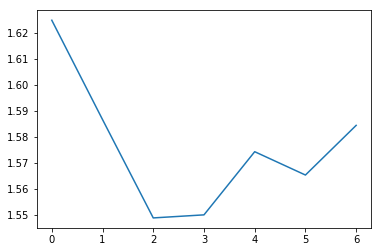

In [16]:
plt.plot(range(epochs), losses)

## Optimization result 

In [17]:
with torch.no_grad(): 
    y_pred = model.forward(x_test.view(len(x_test), -1))
    print(f'Accuracy: {model.accuracy(y_pred, y_test.argmax(1))}')

Accuracy: 0.9215999841690063


## Weights

In [18]:
weight = model.linear.weight.detach().numpy()

### W: 0

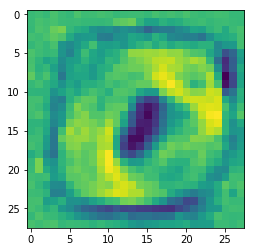

In [19]:
plt.imshow(weight[0, :].reshape(28, 28))
plt.imsave('./Weights/0.png', weight[0, :].reshape(28, 28))

### W: 1

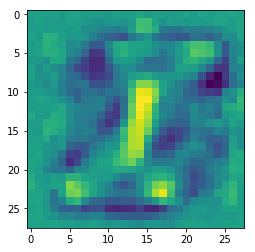

In [20]:
plt.imshow(weight[1, :].reshape(28, 28))
plt.imsave('./Weights/1.png', weight[1, :].reshape(28, 28))

### W: 2

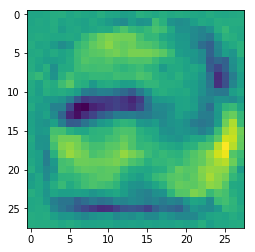

In [21]:
plt.imshow(weight[2, :].reshape(28, 28))
plt.imsave('./Weights/2.png', weight[2, :].reshape(28, 28))

### W: 3

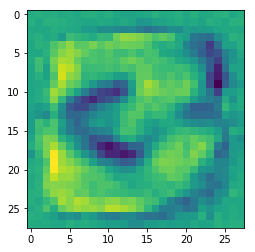

In [22]:
plt.imshow(weight[3, :].reshape(28, 28))
plt.imsave('./Weights/3.png', weight[3, :].reshape(28, 28))

### W:4

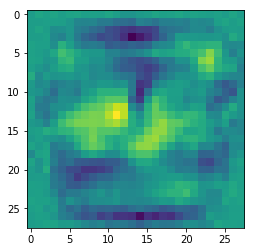

In [23]:
plt.imshow(weight[4, :].reshape(28, 28))
plt.imsave('./Weights/4.png', weight[4, :].reshape(28, 28))

### W: 5

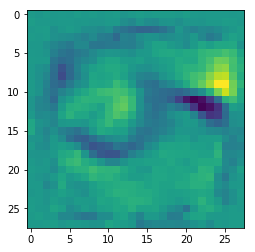

In [24]:
plt.imshow(weight[5, :].reshape(28, 28))
plt.imsave('./Weights/5.png', weight[5, :].reshape(28, 28))

### W: 6

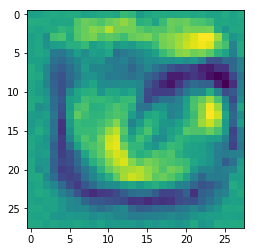

In [25]:
plt.imshow(weight[6, :].reshape(28, 28))
plt.imsave('./Weights/6.png', weight[6, :].reshape(28, 28))

### W: 7

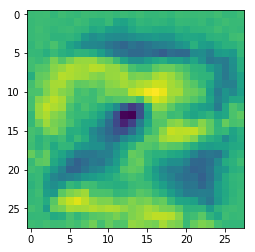

In [26]:
plt.imshow(weight[7, :].reshape(28, 28))
plt.imsave('./Weights/7.png', weight[7, :].reshape(28, 28))

### W: 8

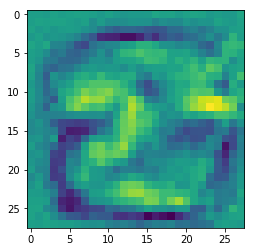

In [27]:
plt.imshow(weight[8, :].reshape(28, 28))
plt.imsave('./Weights/8.png', weight[8, :].reshape(28, 28))

### W: 9

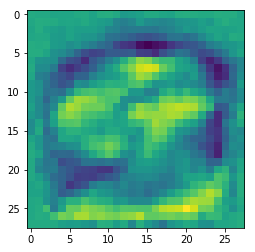

In [28]:
plt.imshow(weight[9, :].reshape(28, 28))
plt.imsave('./Weights/9.png', weight[9, :].reshape(28, 28))